# Vizualization of the results from ExaJuGo


In [1]:
from sc_acopf_viz import *

## The required directories for the California test system

In [2]:
CATS_lines_circuits_dir = "./grids/California/California_line_circuits.csv"
CATS_transformer_dir = "./grids/California/California_transformer.csv"
CATS_gens_dir = "./grids/California/CATS_gens.csv"
CATS_lines_dir = "./grids/California/CATS_lines.json"
CATS_buses_dir = "./grids/California/CATS_buses.csv"
CATS_case_dir = "./grids/California/caseCalifornia.json"

## The directory for the wildfire

In [3]:
WF_dir = "./wildfires/Monument/Monument_wildfire_data.json"

## The directories containing the the data from ExaJuGO

In [4]:
# The file path for the power flow for the SCACOPF problem
pf_filename = "./data-scacopf/Monument/info_dir/SCACOPF_power_flow.txt"

# The file path containing the data for the slacks for the lines and buses 
SCACOPF_slack_filename = "./data-scacopf/Monument/info_dir/SCACOPF_slacks.txt"

### The choice of parameters.
### Note: the choice of parameters should match with the parameters that were chosen when making the con file. This can be found from the contingency name in the file: 
### ./data-scacopf/Monument/info_dir/SCACOPF_contingency.txt

In [5]:
SD = 2 # The safe distance away from a wildfire


### Create the geopandas (gpd) object and extract the longitude and latitude coordinates for the wildfire in the directory WF_dir

In [6]:
fire_area_gdf = gpd.read_file(WF_dir)

WF_lon, WF_lat = Extract_WF_Coordinates(WF_dir)

### Create the object to vizualize the data


In [7]:
WF_obj = WF_figures(CATS_lines_circuits_dir, CATS_transformer_dir, CATS_gens_dir, CATS_lines_dir, CATS_buses_dir,CATS_case_dir)

In [8]:
# provide the coordinates 
WF_obj.Update_WF_coords(WF_lon, WF_lat)

# Find the lines within SD miles from the wildfires
WF_obj.Create_WF_lines_index(SD)

The off information due to the wildfire:
Number of off lines: 4
Number of off transformers: 0
Number of off generator buses: 0



### Plot showing all the off elements in the grid

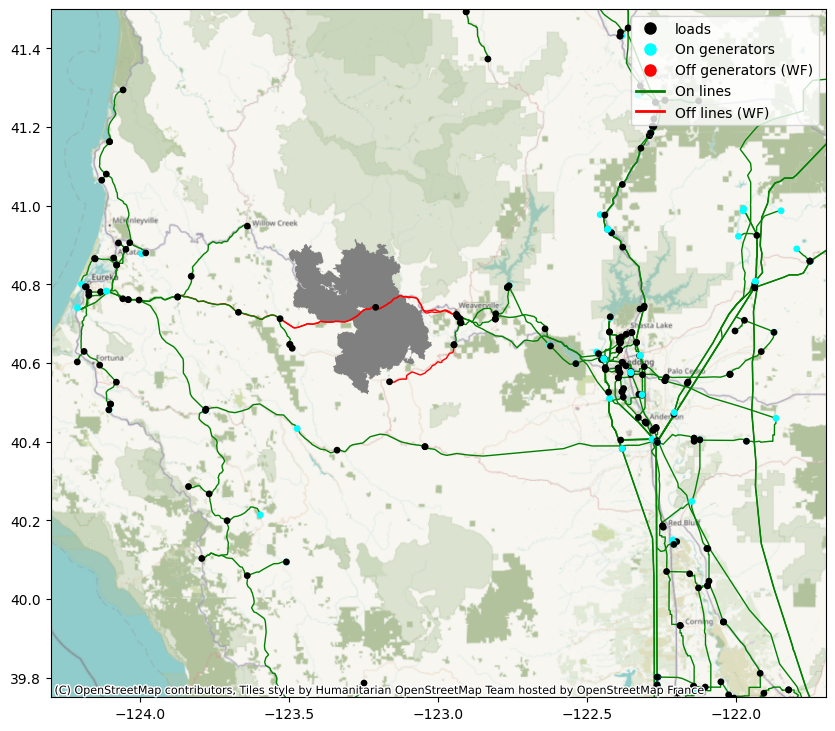

In [9]:
# Color the nodes with the default colors
WF_obj.Update_nodes_colors()
# ID the coordinates that define each line in the grid
WF_obj.Lines_segments()
# Color the lines to indicate which line are within SD miles from the fire
WF_obj.Update_line_colors("green", "red")

# Plot to vizualize the off elements
WF_obj.Off_info_plot(fire_area_gdf, ylim=[39.75, 41.5], xlim=[-124.3, -121.7], loc = "upper right", node_size=15)

### Plot how the power flow through the lines changed after the contingency as a percentage

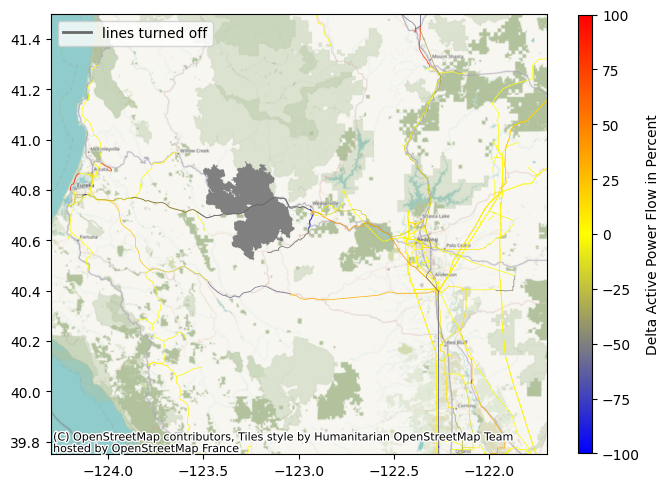

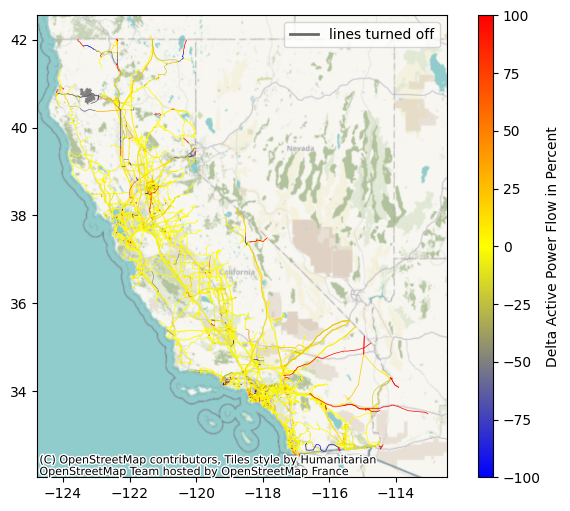

In [10]:
# Only color the line within SD mile as grey
WF_obj.Update_line_colors("none", "grey")
# Provide the power flow data
WF_obj.Create_Power_Flow_data(pf_filename)

# Plot the difference in power flow as percentage near the fire and all of California

WF_obj.Make_Delta_PF_percent_plot(fire_area_gdf, [39.75, 41.5], [-124.3, -121.7], shrink = .95)
WF_obj.Make_Delta_PF_percent_plot(fire_area_gdf, shrink =1.0)

### Plot how the power flow through the lines changed after the contingency

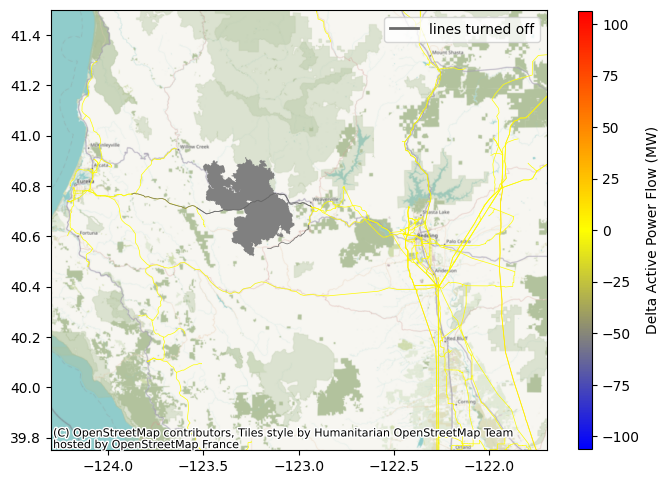

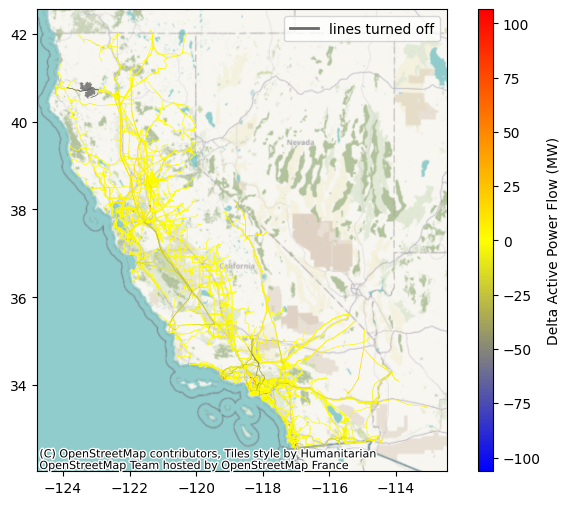

In [11]:
# Plot the difference in power flow near the fire and all of California
WF_obj.Make_Delta_PF_plot(fire_area_gdf, [39.75, 41.5], [-124.3, -121.7], shrink = .95, loc = "upper right")
WF_obj.Make_Delta_PF_plot(fire_area_gdf)


### Plot what lines volated the thermal line limits. This is shown as the slack value.

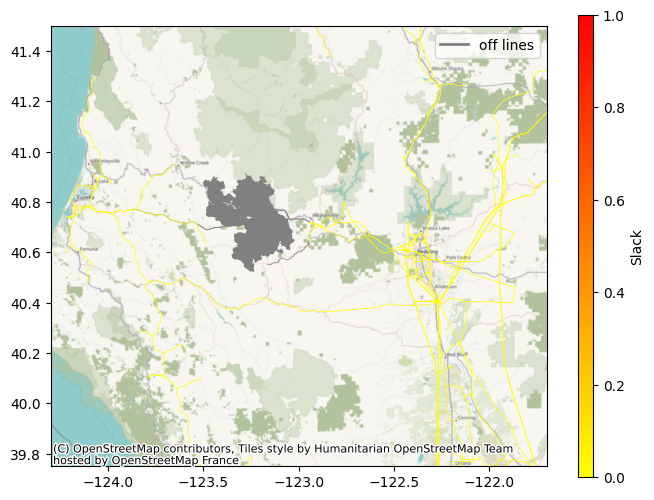

In [12]:
# Define the slacks for the lines and nodes
WF_obj.Define_slack_data(SCACOPF_slack_filename)
# Plot the line slack data. 
# Note: If max on colorbar is 1, then all slack values was 0
WF_obj.Make_Slack_PF_plot(fire_area_gdf, [39.75, 41.5], [-124.3, -121.7])

### Plot what buses violated the power balance equations. This is shown as the slack value

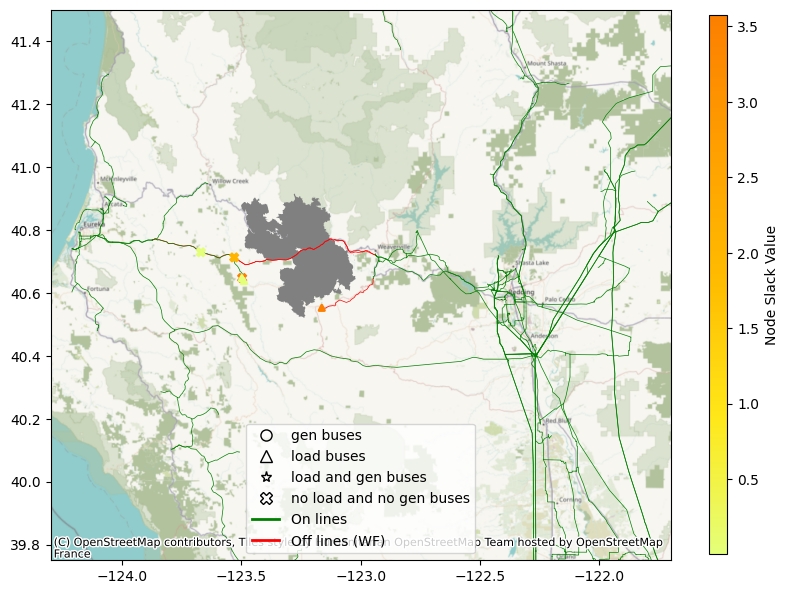

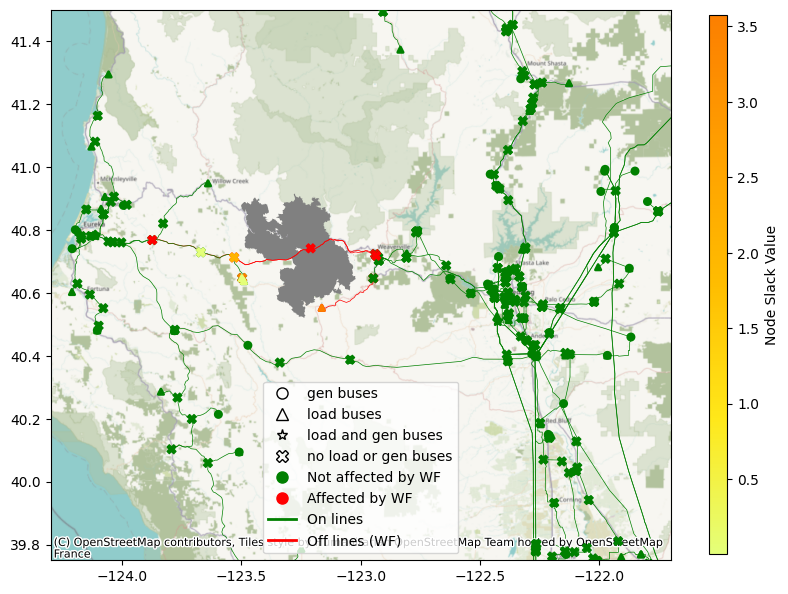

In [13]:
# ID what was turned off and then ID that buses were affected by wildfires
WF_obj.ID_off_info()
WF_obj.Node_type_Index()
WF_obj.Node_affected()
# Green mean lines are work and red are turned off
WF_obj.Line_lengends("green", "red")

# Plot the buses with slack and no other buses
WF_obj.Make_Node_Slack_Plot(True, fire_area_gdf, [39.75, 41.5], [-124.3, -121.7], shrink = .7)
# Plot the buses with slack and the other buses
WF_obj.Make_Node_Slack_Plot(False, fire_area_gdf, [39.75, 41.5], [-124.3, -121.7], shrink = .7)

### Histogram showing number of lines for lying in bins of 10% from -100 to 100

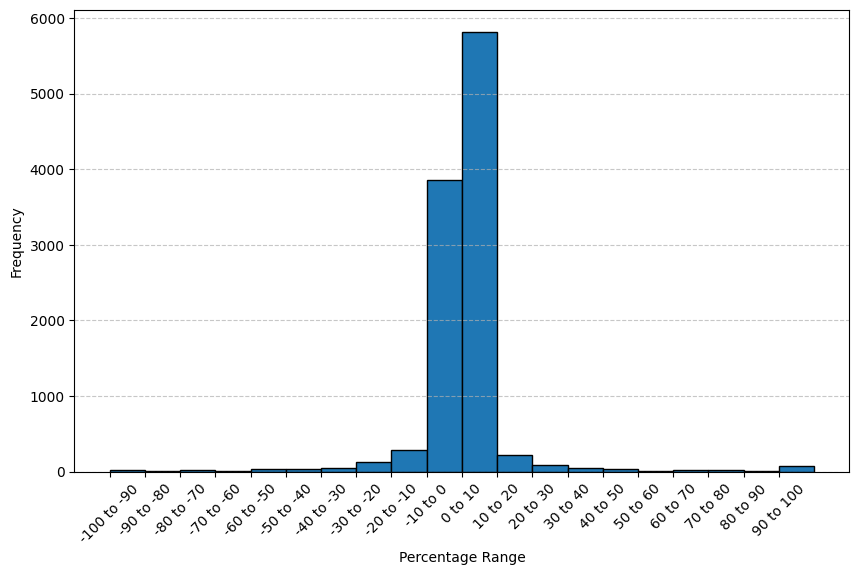

In [14]:
histogram_counts = WF_obj.plot_manual_histogram(WF_obj.percent_delta_pf)

### Show total power demand

In [15]:
WF_obj.Power_System_demand()

Total System Active Power Demand: 44008.915858593995 MW
Total System Reactive Power Demand: 13287.451421048389 MVAR
Total Load only node Active Power Demand: 12744.037856356032 MW
Total Load only node Reactive Power Demand: 3971.0108162312845 MVAR
Total generator only node Active Power Demand: 0.0 MW
Total generator only node Reactive Power Demand: 0.0 MVAR
Total Load and generator node Active Power Demand: 31264.878002238012 MW
Total Load and generator node Reactive Power Demand: 9316.440604817104 MVAR


### Show total power demand for the off buses

In [16]:
WF_obj.Power_System_demand_off_nodes()

Total off node Active Power Demand: 3.57239557 MW
Total off node Reactive Power Demand: 1.04892756 MVAR
Total off load only node Active Power Demand: 3.57239557 MW
Total off load only node Reactive Power Demand: 1.04892756 MVAR
Total off generator only node Active Power Demand: 0 MW
Total off generator only node Reactive Power Demand: 0 MVAR
Total off load and generator node Active Power Demand: 0 MW
Total off load and generator node Reactive Power Demand: 0 MVAR
